# Project
Data Source: https://www.kaggle.com/worldbank/world-development-indicators
<br>Folder: 'world-development-indicators'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Indicators.csv')

### Detect the columns:

In [3]:
data.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [4]:
new_data = data[['CountryName', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']]

### Select data about Brazil

In [5]:
brazil = new_data['CountryName'].str.contains('Brazil')

In [6]:
brazil_data = new_data[brazil]

### Select info about Death Rate

In [7]:
death_rate = brazil_data['IndicatorCode'].str.contains('SP.DYN.CDRT.IN')
brazil_dr = brazil_data[death_rate]
brazil_dr.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5649,Brazil,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,13.410
29730,Brazil,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1961,13.093
56767,Brazil,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1962,12.762
85155,Brazil,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1963,12.419
113867,Brazil,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1964,12.066


### GDP per capita

In [8]:
gdp = brazil_data['IndicatorCode'].str.contains('NY.GDP.PCAP.CD')
brazil_gdp = brazil_data[gdp]
brazil_gdp.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5682,Brazil,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,209.198785
29766,Brazil,GDP per capita (current US$),NY.GDP.PCAP.CD,1961,203.955154
56807,Brazil,GDP per capita (current US$),NY.GDP.PCAP.CD,1962,258.757669
85195,Brazil,GDP per capita (current US$),NY.GDP.PCAP.CD,1963,290.058284
113907,Brazil,GDP per capita (current US$),NY.GDP.PCAP.CD,1964,259.466969


### Life Expectancy

In [9]:
life_expec = brazil_data['IndicatorCode'].str.contains('SP.DYN.LE00.IN')
brazil_ls = brazil_data[life_expec]
brazil_ls.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5736,Brazil,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,54.205463
29829,Brazil,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,54.718707
56872,Brazil,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,55.235659
85260,Brazil,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,55.751390
113972,Brazil,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,56.262951


### Checking the shape of arrays

In [10]:
brazil_dr.shape, brazil_gdp.shape, brazil_ls.shape

((54, 5), (55, 5), (54, 5))

### Cleaning the data

In [11]:
for year in brazil_gdp['Year']:
    if year not in brazil_dr['Year'].values:
        brazil_gdp = brazil_gdp[brazil_gdp.Year != year]

brazil_gdp.shape

(54, 5)

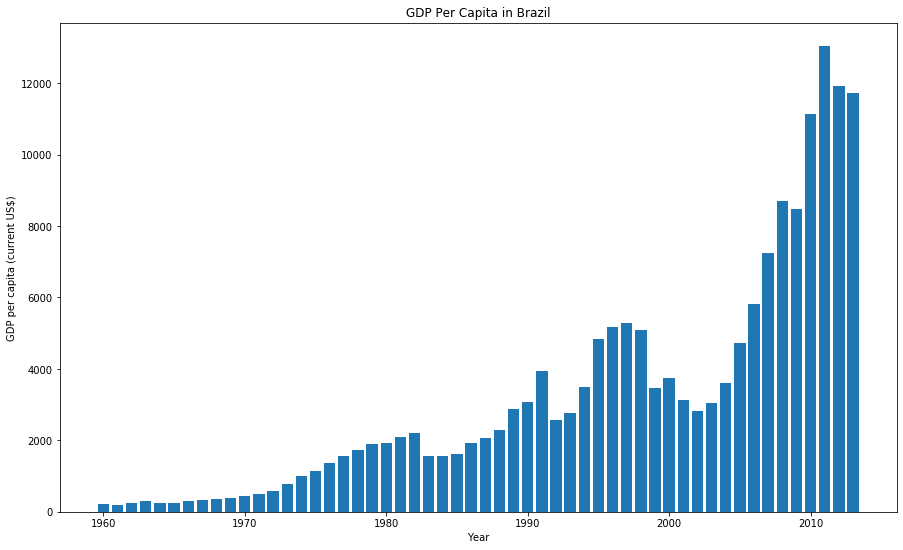

In [61]:
plt.bar(brazil_gdp['Year'].values, brazil_gdp['Value'].values)
plt.xlabel('Year')
plt.ylabel(brazil_gdp['IndicatorName'].iloc[0])
plt.title('GDP Per Capita in Brazil')
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

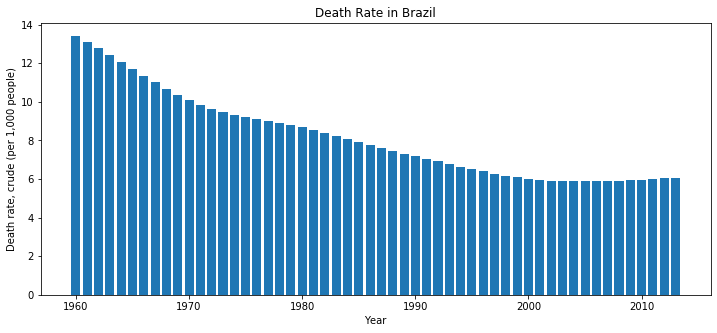

In [13]:
plt.bar(brazil_dr['Year'].values, brazil_dr['Value'].values)
plt.xlabel('Year')
plt.ylabel(brazil_dr['IndicatorName'].iloc[0])
plt.title('Death Rate in Brazil')
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

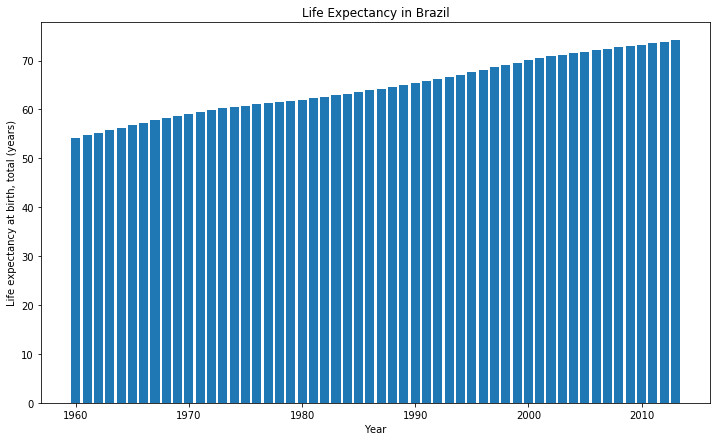

In [14]:
plt.bar(brazil_ls['Year'].values, brazil_ls['Value'].values)
plt.xlabel('Year')
plt.ylabel(brazil_ls['IndicatorName'].iloc[0])
plt.title('Life Expectancy in Brazil')
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

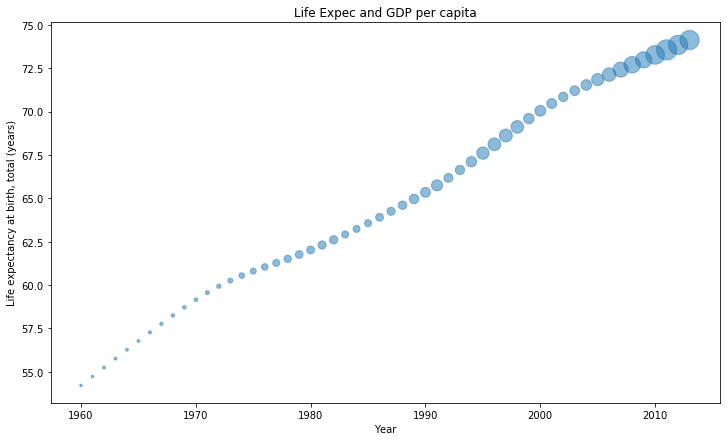

In [15]:
n = brazil_gdp['Value'].values 
area = np.pi * (n/100)
plt.xlabel('Year')
plt.ylabel(brazil_ls['IndicatorName'].iloc[0])
plt.title('Life Expec and GDP per capita')
plt.scatter(brazil_ls['Year'].values, brazil_ls['Value'].values, s=area, alpha=0.5)
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

### Filter GDP for all countries

In [16]:
gdp = new_data['IndicatorCode'].str.contains('NY.GDP.PCAP.CD')
gdp = new_data[gdp]
gdp.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
95,Caribbean small states,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,457.464712
264,East Asia & Pacific (all income levels),GDP per capita (current US$),NY.GDP.PCAP.CD,1960,146.814138
377,East Asia & Pacific (developing only),GDP per capita (current US$),NY.GDP.PCAP.CD,1960,89.319639
518,Euro area,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,924.571393
624,Europe & Central Asia (all income levels),GDP per capita (current US$),NY.GDP.PCAP.CD,1960,648.223441


### Only 2014

In [17]:
gdp_2013 = gdp['Year'] == 2013
last_gdp = gdp[gdp_2013]
last_gdp.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5377565,Arab World,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7498.228102
5378034,Caribbean small states,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,9932.460696
5378492,Central Europe and the Baltics,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,13685.593443
5379016,East Asia & Pacific (all income levels),GDP per capita (current US$),NY.GDP.PCAP.CD,2013,9269.879411
5379603,East Asia & Pacific (developing only),GDP per capita (current US$),NY.GDP.PCAP.CD,2013,5846.943959


### Select the highest GDP

In [18]:
highest = (last_gdp.nlargest(100, 'Value')).sort_values(by='Value')
highest.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5381503,Europe & Central Asia (developing only),GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7162.834490
5481298,Montenegro,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7186.429787
5511808,St. Lucia,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7319.523755
5377565,Arab World,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7498.228102
5415234,Bulgaria,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7656.638506


### Select the lowest GDP

In [19]:
lowest = last_gdp.nsmallest(10, 'Value')
lowest.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5472684,Malawi,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,239.869731
5416910,Burundi,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,259.365208
5420830,Central African Republic,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,326.437109
5425418,"Congo, Dem. Rep.",GDP per capita (current US$),NY.GDP.PCAP.CD,2013,413.697058
5488134,Niger,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,418.492422


### Merge Highest and Brazil data

In [20]:
br_2013 = brazil_gdp['Year'] == 2013
brazil_gdp_13 = brazil_gdp[br_2013]
gdp_concat = [brazil_gdp_13, highest]
gdp_data = pd.concat(gdp_concat).sort_values(by='Value')
gdp_data.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value
5381503,Europe & Central Asia (developing only),GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7162.834490
5481298,Montenegro,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7186.429787
5511808,St. Lucia,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7319.523755
5377565,Arab World,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7498.228102
5415234,Bulgaria,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,7656.638506


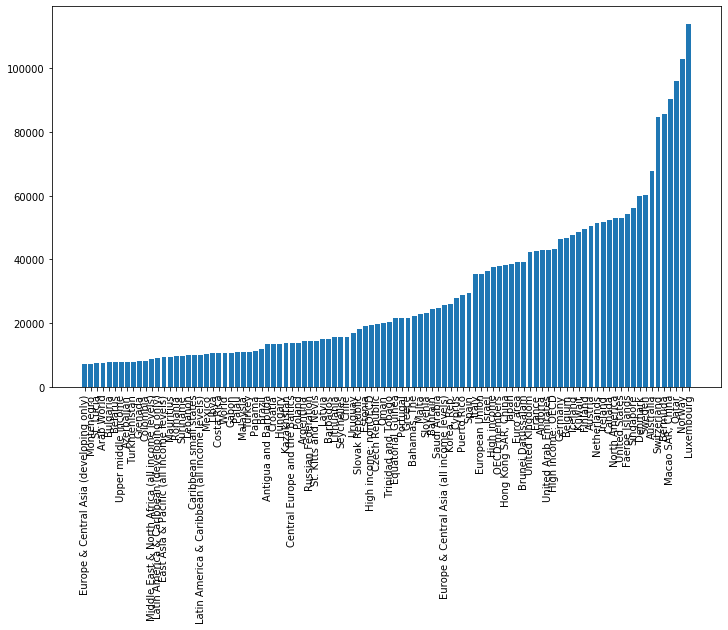

In [21]:
plt.bar(highest['CountryName'].values, highest['Value'].values)
plt.xticks(rotation=90)
plt.show()

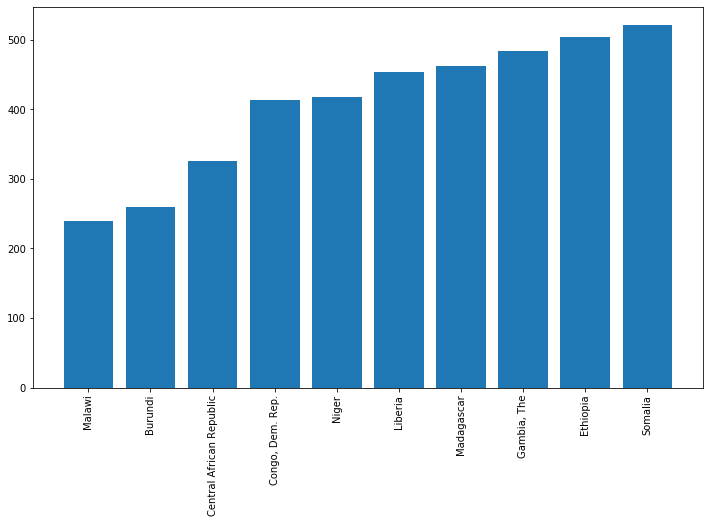

In [22]:
plt.bar(lowest['CountryName'].values, lowest['Value'].values)
plt.xticks(rotation=90)
plt.show()

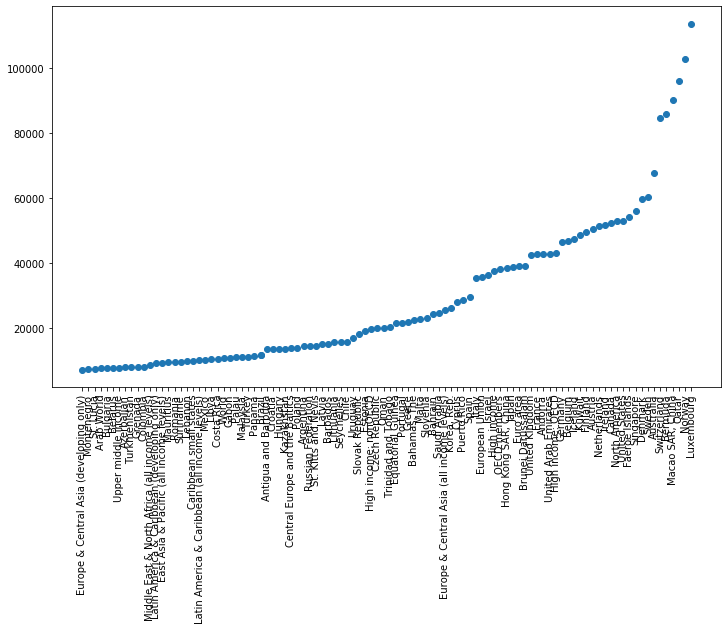

In [23]:
plt.scatter(gdp_data['CountryName'].values, gdp_data['Value'].values)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15, 9]
plt.show()

### Merge in one DataFrame

In [24]:
data.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [25]:
# Filter for life expectancy

lf = data['IndicatorCode'].str.contains('SP.DYN.LE00.IN')
life_expec_all = data[lf]

# only 2013

recent_le = life_expec_all['Year'] == 2013
recent_lfexpec = life_expec_all[recent_le]
recent_lfexpec.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5377671,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,70.631305
5378131,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,71.901964
5378638,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,76.127583
5379153,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,74.604619
5379761,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,73.657617


In [26]:
# Rename column Value

lf_data = recent_lfexpec.rename(index=str, columns={'Value' : 'LifeExpec'})

# Remove columns CountryCode, IndicatorName, Year and IndicatorCode

lf_data = lf_data.drop(['CountryCode', 'IndicatorName', 'IndicatorCode', 'Year'], axis=1)
lf_data.head()

,CountryName,LifeExpec
5377671,Arab World,70.631305
5378131,Caribbean small states,71.901964
5378638,Central Europe and the Baltics,76.127583
5379153,East Asia & Pacific (all income levels),74.604619
5379761,East Asia & Pacific (developing only),73.657617


In [28]:
# Rename column Value

gdp_data = gdp_data.rename(index=str, columns={'Value' : 'GDP'})

# Remove columns CountryCode, IndicatorName, Year and IndicatorCode

gdp_data = gdp_data.drop(['IndicatorName', 'IndicatorCode', 'Year'], axis=1)
gdp_data.head()

,CountryName,GDP
5381503,Europe & Central Asia (developing only),7162.834490
5481298,Montenegro,7186.429787
5511808,St. Lucia,7319.523755
5377565,Arab World,7498.228102
5415234,Bulgaria,7656.638506


In [85]:
# Merge DF

new_data = pd.merge(lf_data, gdp_data, on=['CountryName'])
new_data = new_data.sort_values(by='LifeExpec')
new_data = new_data.drop(new_data.index[:50])
new_data.head()

,CountryName,LifeExpec,GDP
37,Croatia,77.126829,13574.978042
94,United Arab Emirates,77.195634,42831.089132
74,Panama,77.419220,11206.424707
39,Czech Republic,78.278049,19813.871575
78,Qatar,78.418488,96076.996376


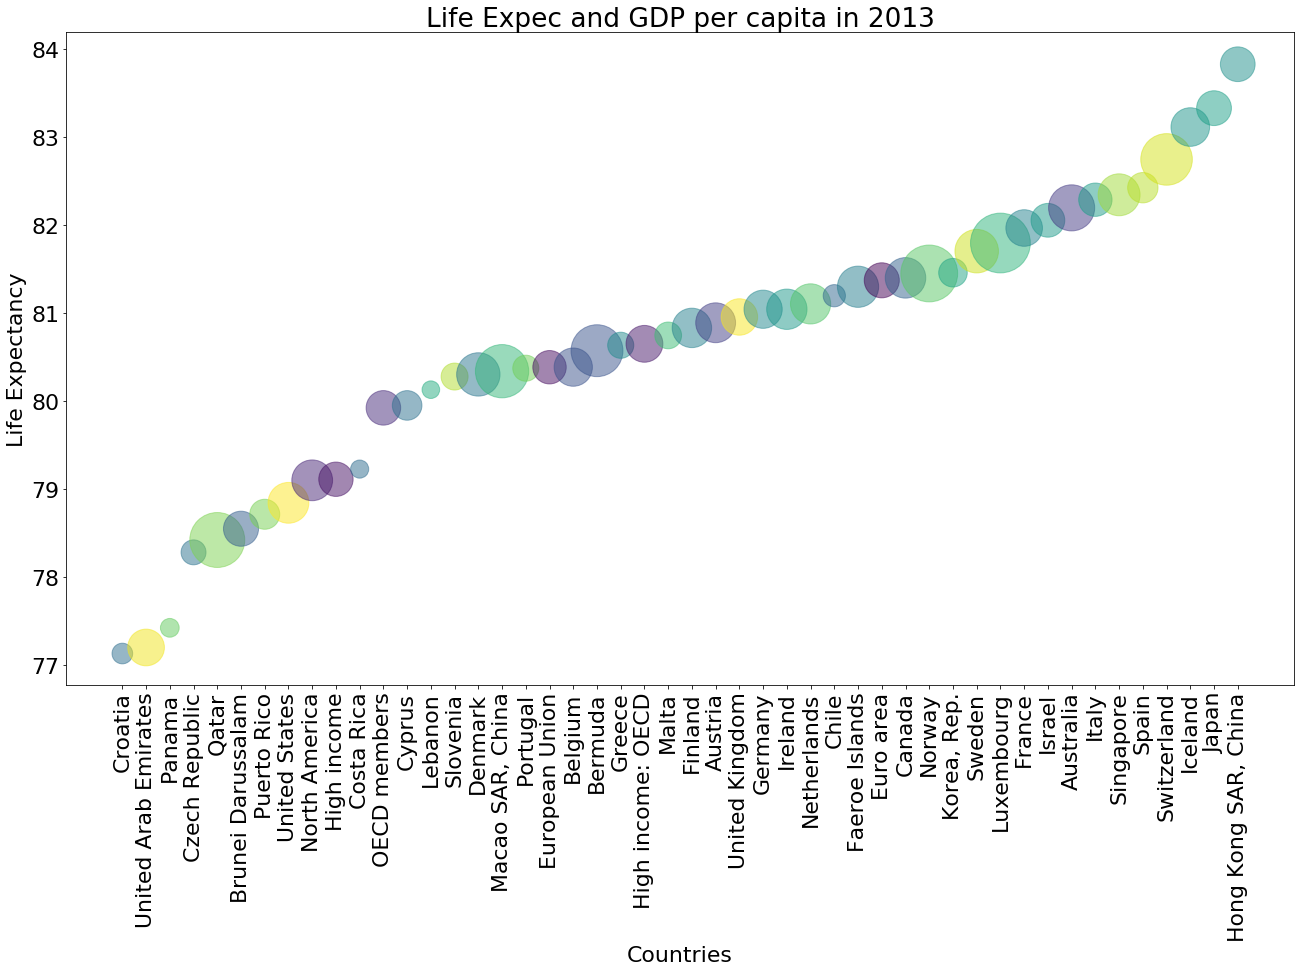

In [89]:
n = new_data['GDP'].values 
area = np.pi * (n/100)
colors = new_data.index
plt.scatter(new_data['CountryName'].values, new_data['LifeExpec'].values, c=colors, s=area, alpha=0.5)
plt.rcParams['figure.figsize'] = [22, 12]
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Life Expectancy')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rcParams.update({'font.size': 22})
plt.title('Life Expec and GDP per capita in 2013')
plt.show()